In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# EDA - 1
## Title :- Bike details Dataset

## 1. What is the range of selling prices in the dataset
### Range of Selling Prices: ₹755000

In [2]:
# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Calculate minimum and maximum selling price
selling_price_min = df['selling_price'].min()
selling_price_max = df['selling_price'].max()

# Calculate the range
selling_price_range = selling_price_max - selling_price_min

# Print the results
print(f"Minimum Selling Price: ₹{selling_price_min}")
print(f"Maximum Selling Price: ₹{selling_price_max}")
print(f"Range of Selling Prices: ₹{selling_price_range}")


Minimum Selling Price: ₹5000
Maximum Selling Price: ₹760000
Range of Selling Prices: ₹755000


## 2. What is the median selling price for bikes in the dataset
### Median_price:- 45000.0

In [30]:
# median selling price for bikes in the dataset
Median_price = df['selling_price'].median()
print(f'Median_price:-', Median_price)


Median_price:- 45000.0


## 3. What is the most common seller type?
###  Individual 


In [ ]:
df['seller_type'].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

## 4. How many bikes have driven more than 50,000 kilometers
### 170

In [55]:
"""
bikes have driven more than 50,000 kilometers
"""

# filter Bike Km_range > 50,000
high_mileage_bikes = df[df['km_driven']>50000]
high_mileage_bikes = high_mileage_bikes.shape[0]
print(f"Bikes Drive More than 50,000:- ", high_mileage_bikes)



Bikes Drive More than 50,000:-  170


## 5. What is the average km_driven value for each ownership type

In [156]:
#  the average km_driven value for each ownership type
Avg_km_by_owner = df.groupby('owner')['km_driven'].mean().reset_index()
print("Average km_driven by ownership type:")
display(Avg_km_by_owner)

Average km_driven by ownership type:


,owner,km_driven
0,1st owner,32816.583333
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,4th owner,311500.000000


## 6. What proportion of bikes are from the year 2015 or older

In [10]:
# proportion of bikes are from the year 2015 or older
count_bike = df[df['year']<= 2015]
count_bike = len(count_bike) / len(df)
display(f"Proportion of bikes from 2015 or older: {count_bike*100}")

'Proportion of bikes from 2015 or older: 56.64467483506126'

## 7. What is the trend of missing values across the dataset

In [ ]:
# #  the trend of missing values across the dataset

# count Missing values in datset
missing_counts = df.isnull().sum()
missing_counts = df.isnull().mean()*100 
print(missing_counts)

name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


## 8. What is the highest ex_showroom_price recorded, and for which bike
### Harley-Davidson Street Bob    1278000.0

In [12]:

ex_showroom_price = df.groupby('name')['ex_showroom_price'].max()
print("Highest ex-showroom price recorded for each bike:")
print(ex_showroom_price[ex_showroom_price == ex_showroom_price.max()])

Highest ex-showroom price recorded for each bike:
name
Harley-Davidson Street Bob    1278000.0
Name: ex_showroom_price, dtype: float64


## 9. What is the total number of bikes listed by each seller type


In [13]:
#total number of bikes listed by each seller type
seller_type_count = df['seller_type'].value_counts().reset_index()
seller_type_count.columns = ['seller_type', 'count']
print("Total number of bikes listed by each seller type:")  
display(seller_type_count)


Total number of bikes listed by each seller type:


,seller_type,count
0,Individual,1055
1,Dealer,6


## 10. What is the relationship between selling_price and km_driven for first-owner bikes
### Correlation between selling price and km driven for first owner bikes: nan

In [14]:

first_owner_bikes = df[df['owner'] == 'First Owner']
correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
print(f"Correlation between selling price and km driven for first owner bikes: {correlation:.2f}")





Correlation between selling price and km driven for first owner bikes: nan


## 11. Identify and remove outliers in the km_driven column using the IQR method

In [ ]:
# Identify and remove outliers in the km_driven column using the IQR method


# Step 1: Calculate IQR for km_driven
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Step 3: Filter the dataset to remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Step 4: Display result
print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape[0]}")


IQR: 29500.0
Lower Bound: -30750.0
Upper Bound: 87250.0
Original dataset size: 1061
Dataset size after removing outliers: 1022


## 12. Perform a bivariate analysis to visualize the relationship between year and selling_price

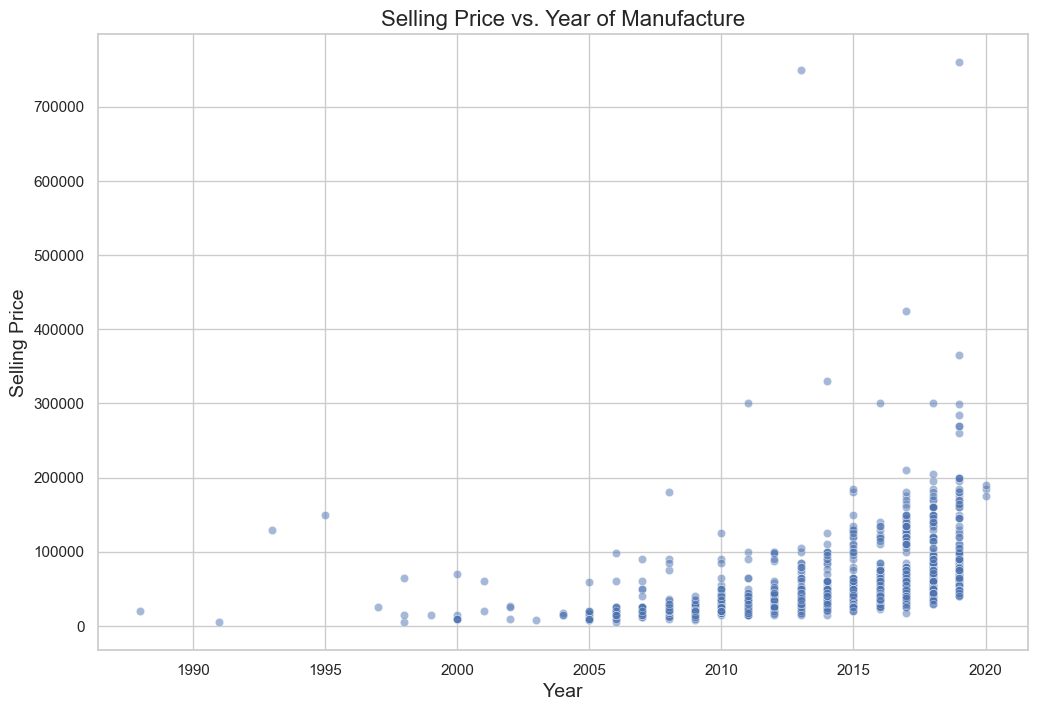

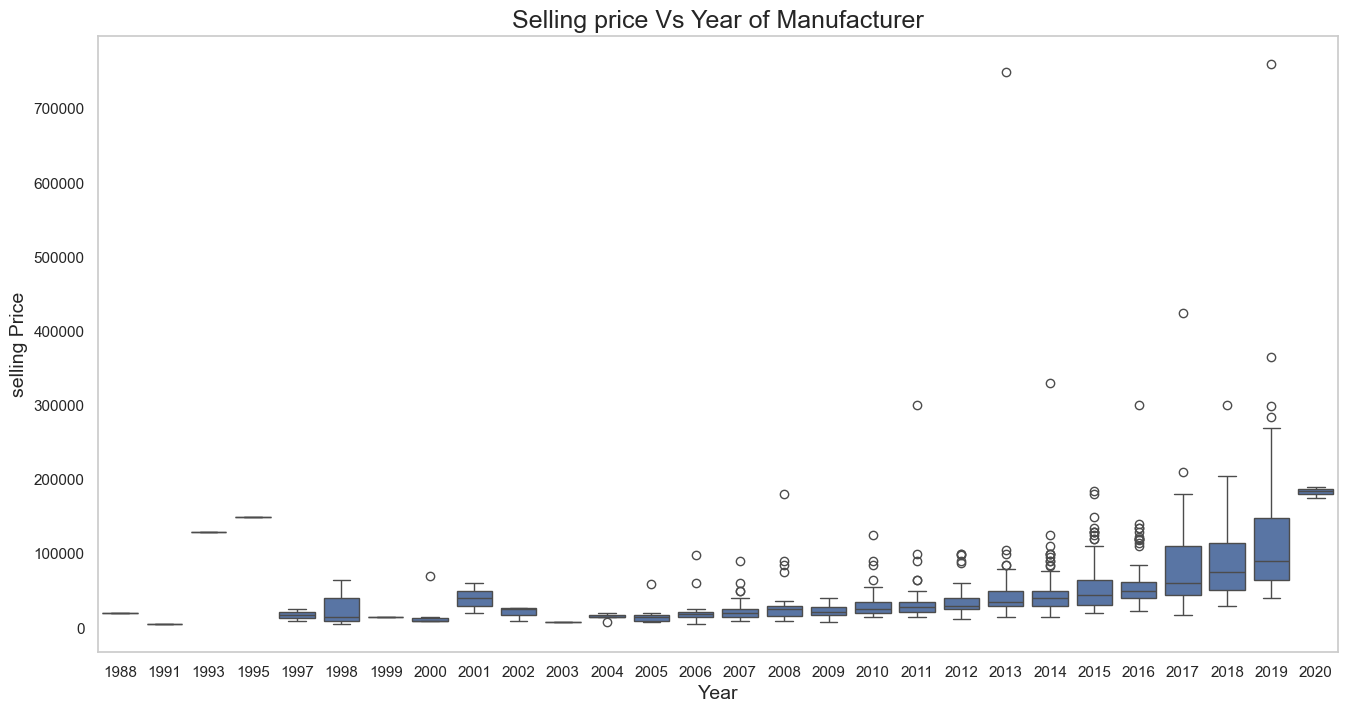

In [210]:
# Perform a bivariate analysis to visualize the relationship between year and selling_price

# compare Selling price and year of manufacture

plt.figure(figsize=(12,8))
sns.scatterplot(data=df_clean, x='year', y='selling_price', alpha=0.5)
plt.title('Selling Price vs. Year of Manufacture', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)
plt.grid(True)
plt.show()

# Compare selling price and year using a box plot
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x='year', y='selling_price')
plt.title('Selling price Vs Year of Manufacturer', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('selling Price', fontsize=14)
plt.grid(axis='y')
plt.show()



## 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
### Average depreciation in selling price based on bike's age: ₹7001.30

In [238]:
# the average depreciation in selling price based on the bike's age (current year - manufacturing) year
current_year = 2025
df['age'] = current_year - df['year']
df['depreciation'] = df['selling_price']/df['age']
avg_depreciation = df['depreciation'].mean()
print(f"Average depreciation in selling price based on bike's age: ₹{avg_depreciation:.2f}")




Average depreciation in selling price based on bike's age: ₹7001.30


## 14. Which bike names are priced significantly above the average price for their manufacturing year

## 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

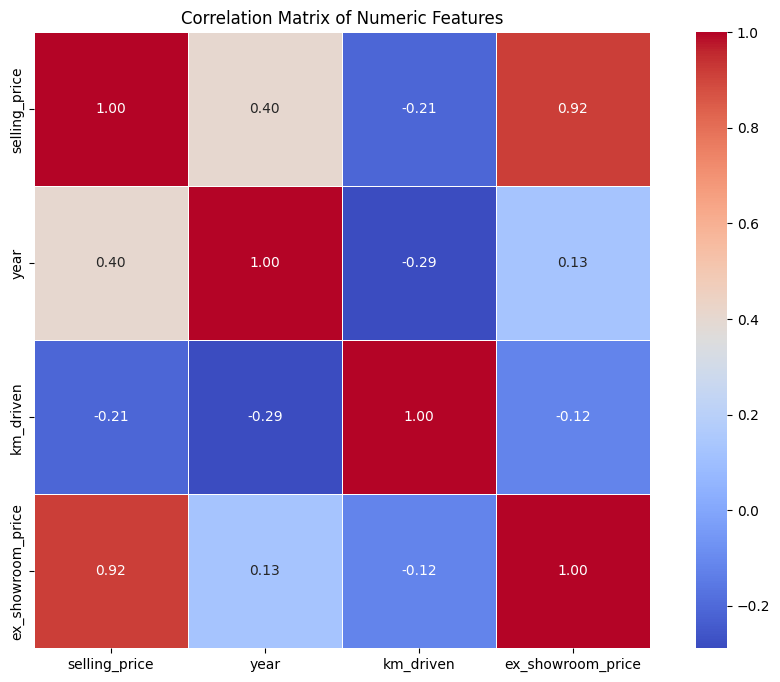

In [22]:

# Step 1: Select numeric columns
numeric_df = df.select_dtypes(include='number')

# Step 2: Compute correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


# EDA - 2
## Title - Car sales dataset

In [27]:
df = pd.read_csv('Car sale.csv')
df.head(5)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


## 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers

In [29]:
Avg_selling_price_by_Dealer = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index().round(2)
print("Average selling price by dealer:")
display(Avg_selling_price_by_Dealer)

Average selling price by dealer:


,Dealer_Name,Price ($)
0,Buddy Storbeck's Diesel Service Inc,27217.26
1,C & M Motors Inc,28111.76
2,Capitol KIA,28189.70
3,Chrysler Plymouth,27555.53
4,Chrysler of Tri-Cities,28123.09
5,Classic Chevy,28602.01
6,Clay Johnson Auto Sales,27816.03
7,Diehl Motor CO Inc,27993.93
8,Enterprise Rent A Car,28312.58
9,Gartner Buick Hyundai Saab,28247.62


## 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends
### Lincoln	brand (Company) has the highest variation in prices

Price Variation by Car Brand:


,Company,Price Variation
15,Lincoln,19658.05
24,Saab,19653.74
4,Cadillac,19517.12
21,Plymouth,19066.00
14,Lexus,17852.92
3,Buick,17142.23
17,Mercury,16445.17
19,Nissan,16214.26
25,Saturn,15990.22
8,Ford,15849.09


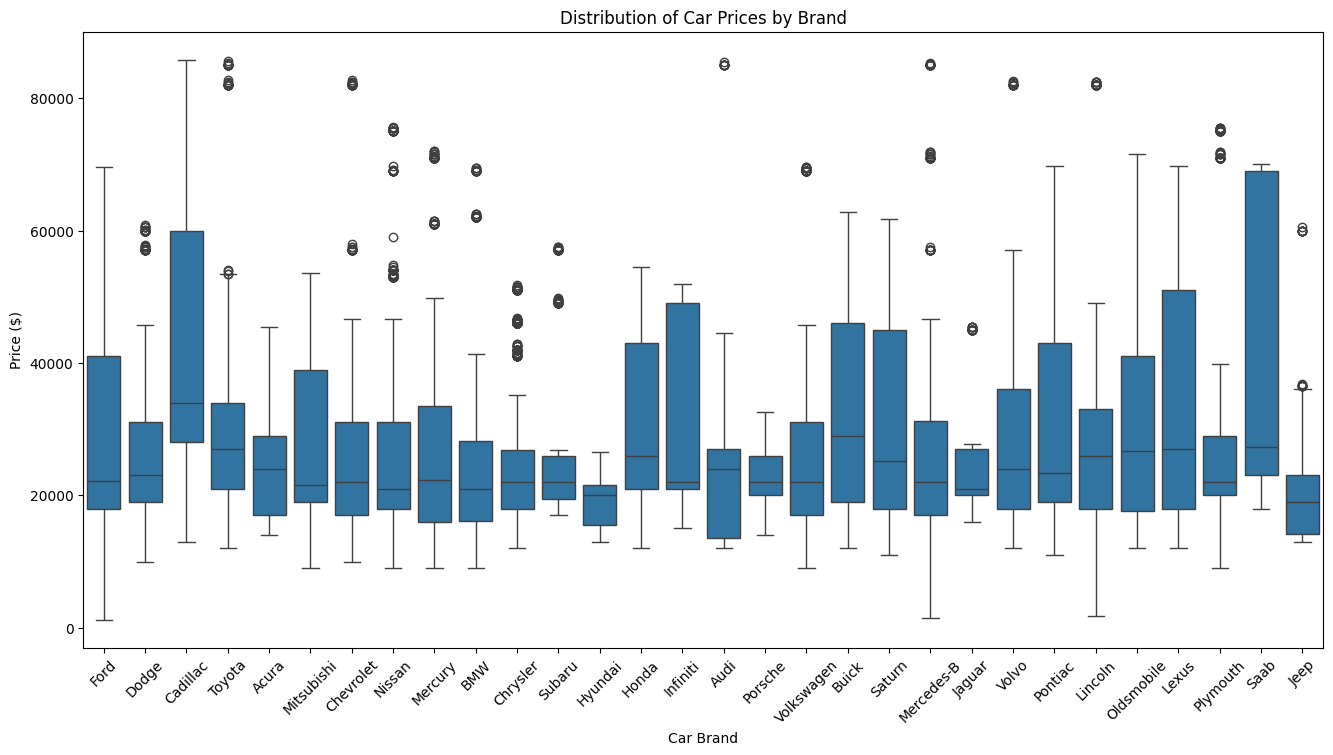

In [30]:

price_variation_by_brand = df.groupby('Company')['Price ($)'].std().reset_index().round(2)
price_variation_by_brand.columns = ['Company', 'Price Variation']
print('Price Variation by Car Brand:')
display(price_variation_by_brand.sort_values(by='Price Variation', ascending=False))


# Visualize the distribution of car prices across different brands

plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x='Company', y='Price ($)')
plt.title('Distribution of Car Prices by Brand')
plt.xticks(rotation=45)
plt.xlabel('Car Brand')
plt.ylabel('Price ($)')
plt.show()

## 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

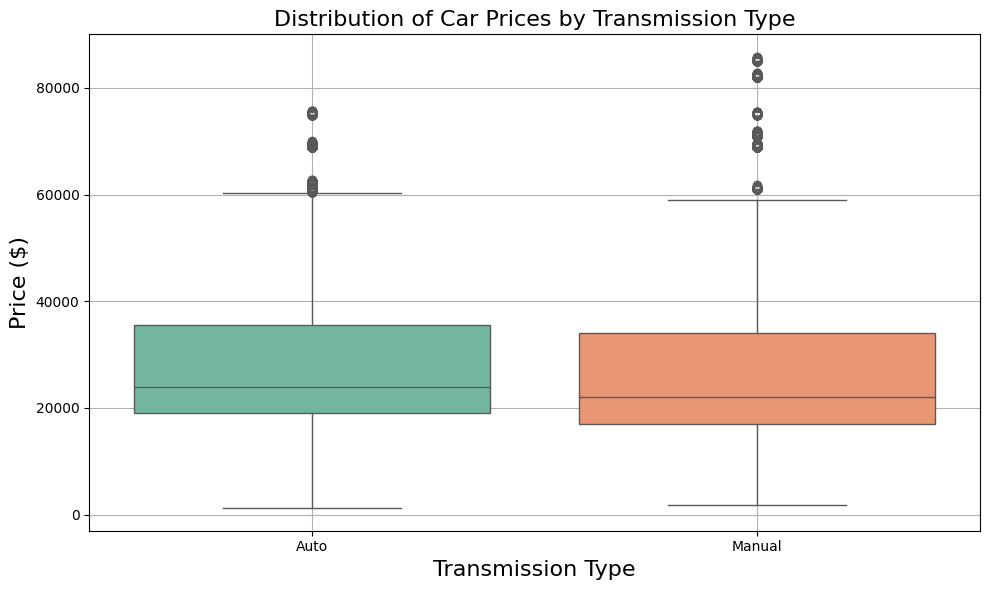

,25%,75%,IQR
Transmission,,,
Auto,19000.0,35500.0,16500.0
Manual,17000.0,34000.0,17000.0


In [ ]:


# Create a boxplot to show distribution of car prices for each transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Transmission', y='Price ($)', palette='Set2')

plt.title('Distribution of Car Prices by Transmission Type', fontsize = 16)
plt.xlabel('Transmission Type', fontsize = 16)
plt.ylabel('Price ($)', fontsize = 16)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate Interquartile Range (IQR) for each transmission type
iqr_by_transmission = df.groupby('Transmission')['Price ($)'].describe()[['25%', '75%']]
iqr_by_transmission['IQR'] = iqr_by_transmission['75%'] - iqr_by_transmission['25%']
iqr_by_transmission


## 4. What is the distribution of car prices across different regions

In [51]:
# What is the distribution of car prices across different regions
Price_in_diffrent_Dealer_Region = df.groupby('Dealer_Region')['Price ($)'].mean().reset_index().round(2)
print("Average Car Price in Different Dealer_Region:")
display(Price_in_diffrent_Dealer_Region)

Average Car Price in Different Dealer_Region:


,Dealer_Region,Price ($)
0,Aurora,28334.63
1,Austin,28341.60
2,Greenville,28180.82
3,Janesville,27833.35
4,Middletown,27856.34
5,Pasco,28119.04
6,Scottsdale,27954.96


## 5. What is the distribution of cars based on body styles

Distribution of Cars Based on Body Styles:


,Body Style,count
0,SUV,6374
1,Hatchback,6128
2,Sedan,4488
3,Passenger,3945
4,Hardtop,2971


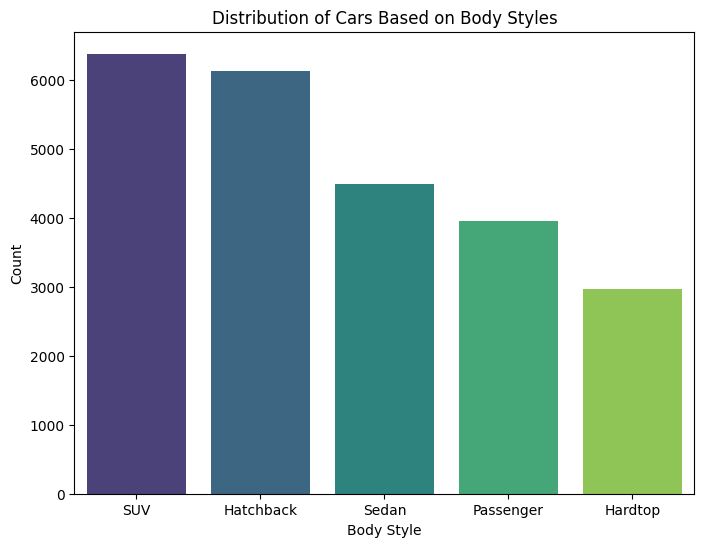

In [72]:
# the distribution of cars based on body styles
Car_on_Body_style = df['Body Style'].value_counts().reset_index()
# Car_on_Body_style.columns = ['Body Style', 'count']
print("Distribution of Cars Based on Body Styles:")
display(Car_on_Body_style)

# Visualize the distribution of car based on body styles
plt.figure(figsize=(8, 6))
sns.barplot(data=Car_on_Body_style, x='Body Style', y='count', palette='viridis')
plt.title('Distribution of Cars Based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()

## 6. How does the average selling price of cars vary by customer gender and annual income

In [85]:
#  How does the average selling price of cars vary by customer gender and annual income
# Group by Gender and calculate average Price and Annual Income
avg_price_income_by_gender = (
    df.groupby('Gender')[['Price ($)', 'Annual Income']]
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={'Price ($)': 'Average Price ($)', 'Annual Income': 'Average Income'})
)

avg_price_income_by_gender



,Gender,Average Price ($),Average Income
0,Female,28277.27,755973.02
1,Male,28039.43,851184.04


## 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region

In [90]:
#  the distribution of car prices by region, and how does the number of cars sold vary by region

# Group by Dealer_Region and calculate average Price and count of cars sold
avg_price_count_by_region = (
    df.groupby('Dealer_Region')['Price ($)']
    .agg(['mean', 'count'])
    .reset_index()
    .round(2)
    .rename(columns={'mean': 'Average Price ($)', 'count': 'Number of Cars Sold'})
)
print("Average Car Price and Number of Cars Sold by Region:")
display(avg_price_count_by_region)


Average Car Price and Number of Cars Sold by Region:


,Dealer_Region,Average Price ($),Number of Cars Sold
0,Aurora,28334.63,3130
1,Austin,28341.60,4135
2,Greenville,28180.82,3128
3,Janesville,27833.35,3821
4,Middletown,27856.34,3128
5,Pasco,28119.04,3131
6,Scottsdale,27954.96,3433


## 8. How does the average car price differ between cars with different engine sizes

In [100]:
avg_car_price_by_engine = df.groupby('Engine')['Price ($)'].mean().reset_index().round(2)
avg_car_price_by_engine.columns = ['Engine Size', 'Average Price ($)']

print("Average Car Price by Engine Size:")
display(avg_car_price_by_engine)

Average Car Price by Engine Size:


,Engine Size,Average Price ($)
0,DoubleÂ Overhead Camshaft,28248.53
1,Overhead Camshaft,27914.71


## 9. How do car prices vary based on the customer’s annual income bracket

In [ ]:
# car prices vary based on the customer’s annual income bracket
# Define income brackets
income_brackets = [
    (0, 30000),
    (30001, 60000),
    (60001, 90000),
    (90001, 120000),
    (120001, np.inf)
]

# Create labels for the income brackets
income_labels = ['0-30K', '30K-60K', '60K-90K', '90K-120K', '120K+']

# Create a new column for income brackets
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=[bracket[0] for bracket in income_brackets] + [income_brackets[-1][1]], labels=income_labels, right=False)

# Calculate average price for each income bracket
avg_price_by_income_bracket = df.groupby('Income Bracket')['Price ($)'].mean().reset_index().round(2)
avg_price_by_income_bracket.columns = ['Income Bracket', 'Average Price ($)']
print("Average Car Price by Income Bracket:")
display(avg_price_by_income_bracket)

Average Car Price by Income Bracket:


,Income Bracket,Average Price ($)
0,0-30K,27884.3
1,30K-60K,NaN
2,60K-90K,43000.0
3,90K-120K,46001.0
4,120K+,28146.8


## 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look

In [131]:
# the top 5 car models with the highest number of sales, and how does their price distribution look
# Model_with_highest_number_of_sales = df['Model'].value_counts().head(5).reset_index()
highest_sales = df.groupby('Model')['Price ($)'].mean().reset_index().head(5)

print("Top 5 Car Models with Highest Number of Sales:")
display(highest_sales)

# Price Distribution of Top 5 Car Models
# sns.boxplot(data=df, x='Model', y='Price ($)', palette='Set2')

Top 5 Car Models with Highest Number of Sales:


,Model,Price ($)
0,3-Sep,37986.380117
1,3000GT,22282.250825
2,300M,21394.888889
3,323i,17355.634615
4,328i,27821.359223


## 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation

Average Car Price and Variation by Engine Size and Color:


,Engine Size,Color,Average Price ($),Price Variation ($)
0,Overhead Camshaft,Black,31732.97,17457.41
1,Overhead Camshaft,Red,30153.41,17346.64
2,DoubleÂ Overhead Camshaft,Pale White,30347.99,14402.41
3,DoubleÂ Overhead Camshaft,Red,27434.39,13499.35
4,Overhead Camshaft,Pale White,24327.77,13000.10
5,DoubleÂ Overhead Camshaft,Black,25766.45,12418.67


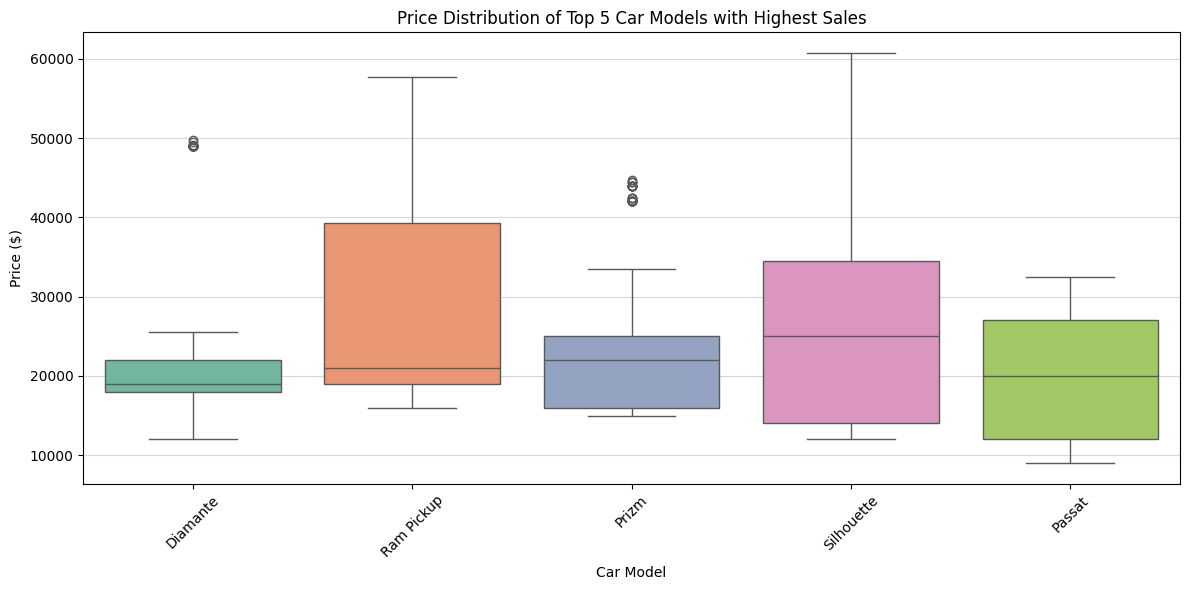

In [32]:

top_5_models = df['Model'].value_counts().nlargest(5).index
top_5_sales = df[df['Model'].isin(top_5_models)]



Engine_with_color = df.groupby(['Engine', 'Color'])['Price ($)'].agg(['mean', 'std']).round(2).sort_values(by='std', ascending=False).reset_index()
Engine_with_color.columns = ['Engine Size', 'Color', 'Average Price ($)', 'Price Variation ($)']
print("Average Car Price and Variation by Engine Size and Color:") 
display(Engine_with_color)

# Visualize the price distribution of the top 5 car models with highest sales
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_5_sales, x='Model', y='Price ($)', palette='Set2')
plt.title('Price Distribution of Top 5 Car Models with Highest Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

## 12. Is there any seasonal trend in car sales based on the date of sale.
### yes there is seasonal trend in car sales based on the date of sale

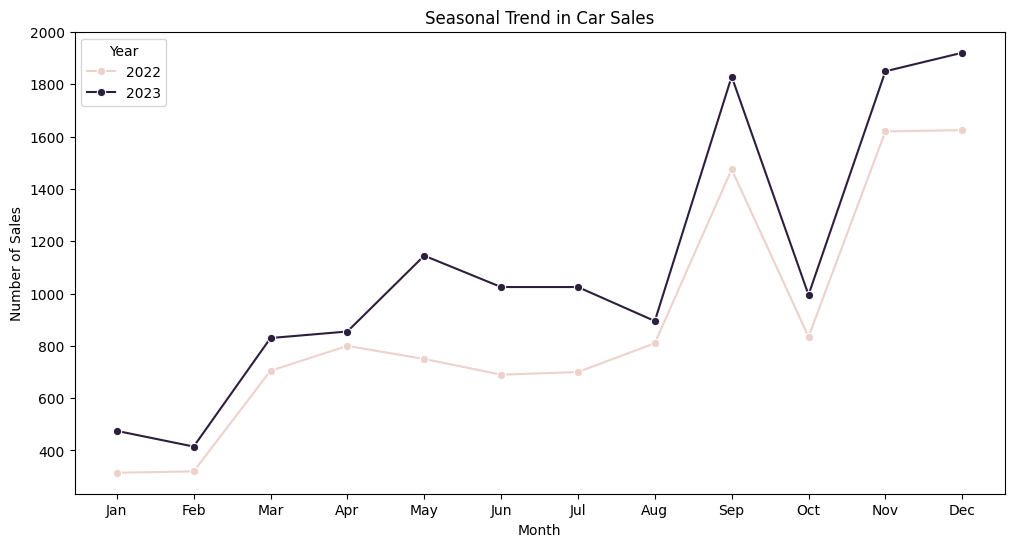

In [166]:
# Is there any seasonal trend in car sales based on the date of sales 

# Convert 'Date of Sale' to datetime format
df['Date of Sale'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract month and year from the date
df['Month'] = df['Date of Sale'].dt.month
df['Year'] = df['Date of Sale'].dt.year

# Group by month and year to get the number of sales
monthly_sales = df.groupby(['Year', 'Month']).size().reset_index(name='Number of Sales')
# Visualize the seasonal trend in car sales
plt.figure(figsize=(12, 6)) 
sns.lineplot(data=monthly_sales, x='Month', y='Number of Sales', hue='Year', marker='o')

plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Sales')   
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')

## 13. How does the car price distribution change when considering different combinations of body style and transmission type

Average Car Price Distribution by Body Style and Transmission Type:


Transmission,Auto,Manual
Body Style,,
Hardtop,31520.19,27016.94
Hatchback,25910.54,28702.55
Passenger,28915.84,28969.52
SUV,27501.40,26079.02
Sedan,29955.29,29664.27


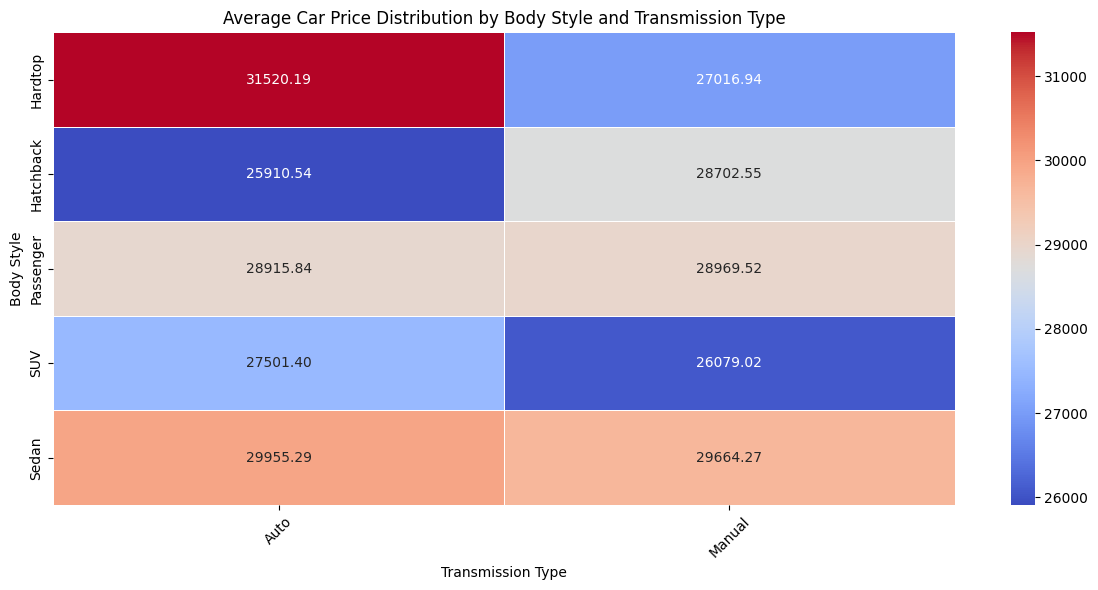

In [33]:

# Create a pivot table to analyze the average price by Body Style and Transmission Type
pivot_table = df.pivot_table(values='Price ($)', index='Body Style', columns='Transmission', aggfunc='mean').round(2)
print("Average Car Price Distribution by Body Style and Transmission Type:")
display(pivot_table)

# Visualize the average price distribution by Body Style and Transmission Type
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Average Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Body Style')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

Correlation between Car Price and Annual Income:


,Price ($),Annual Income
Price ($),1.00,0.01
Annual Income,0.01,1.00


Text(0.5, 1.0, 'Correlation Matrix between Car Price, Engine Size, and Annual Income')

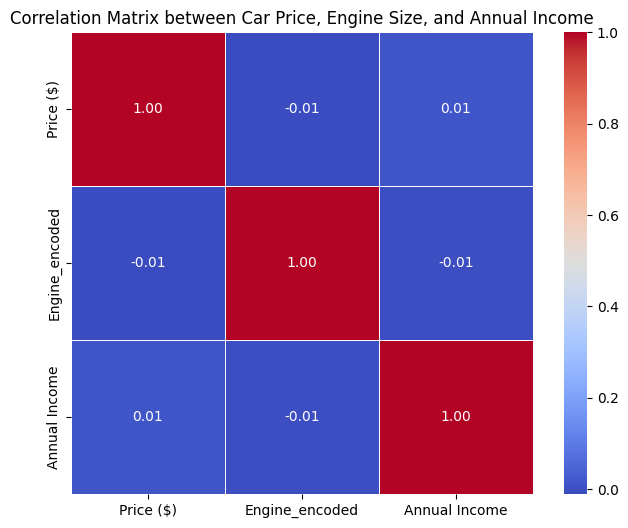

In [174]:
# What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

correlation = df[['Price ($)', 'Annual Income']].corr().round(2)
print("Correlation between Car Price and Annual Income:")
display(correlation)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Matrix between Car Price, Engine Size, and Annual Income')




## 15. How does the average car price vary across different car models and engine types

Average Car Price by Model and Engine Size:


,Car Model,Engine Size,Average Price ($)
0,3-Sep,DoubleÂ Overhead Camshaft,37986.38
1,3000GT,DoubleÂ Overhead Camshaft,22764.33
2,3000GT,Overhead Camshaft,21770.66
3,300M,DoubleÂ Overhead Camshaft,21394.89
4,323i,DoubleÂ Overhead Camshaft,16744.63
5,323i,Overhead Camshaft,21038.16
6,328i,DoubleÂ Overhead Camshaft,21069.15
7,328i,Overhead Camshaft,38676.18
8,4Runner,DoubleÂ Overhead Camshaft,32167.79
9,4Runner,Overhead Camshaft,25075.42


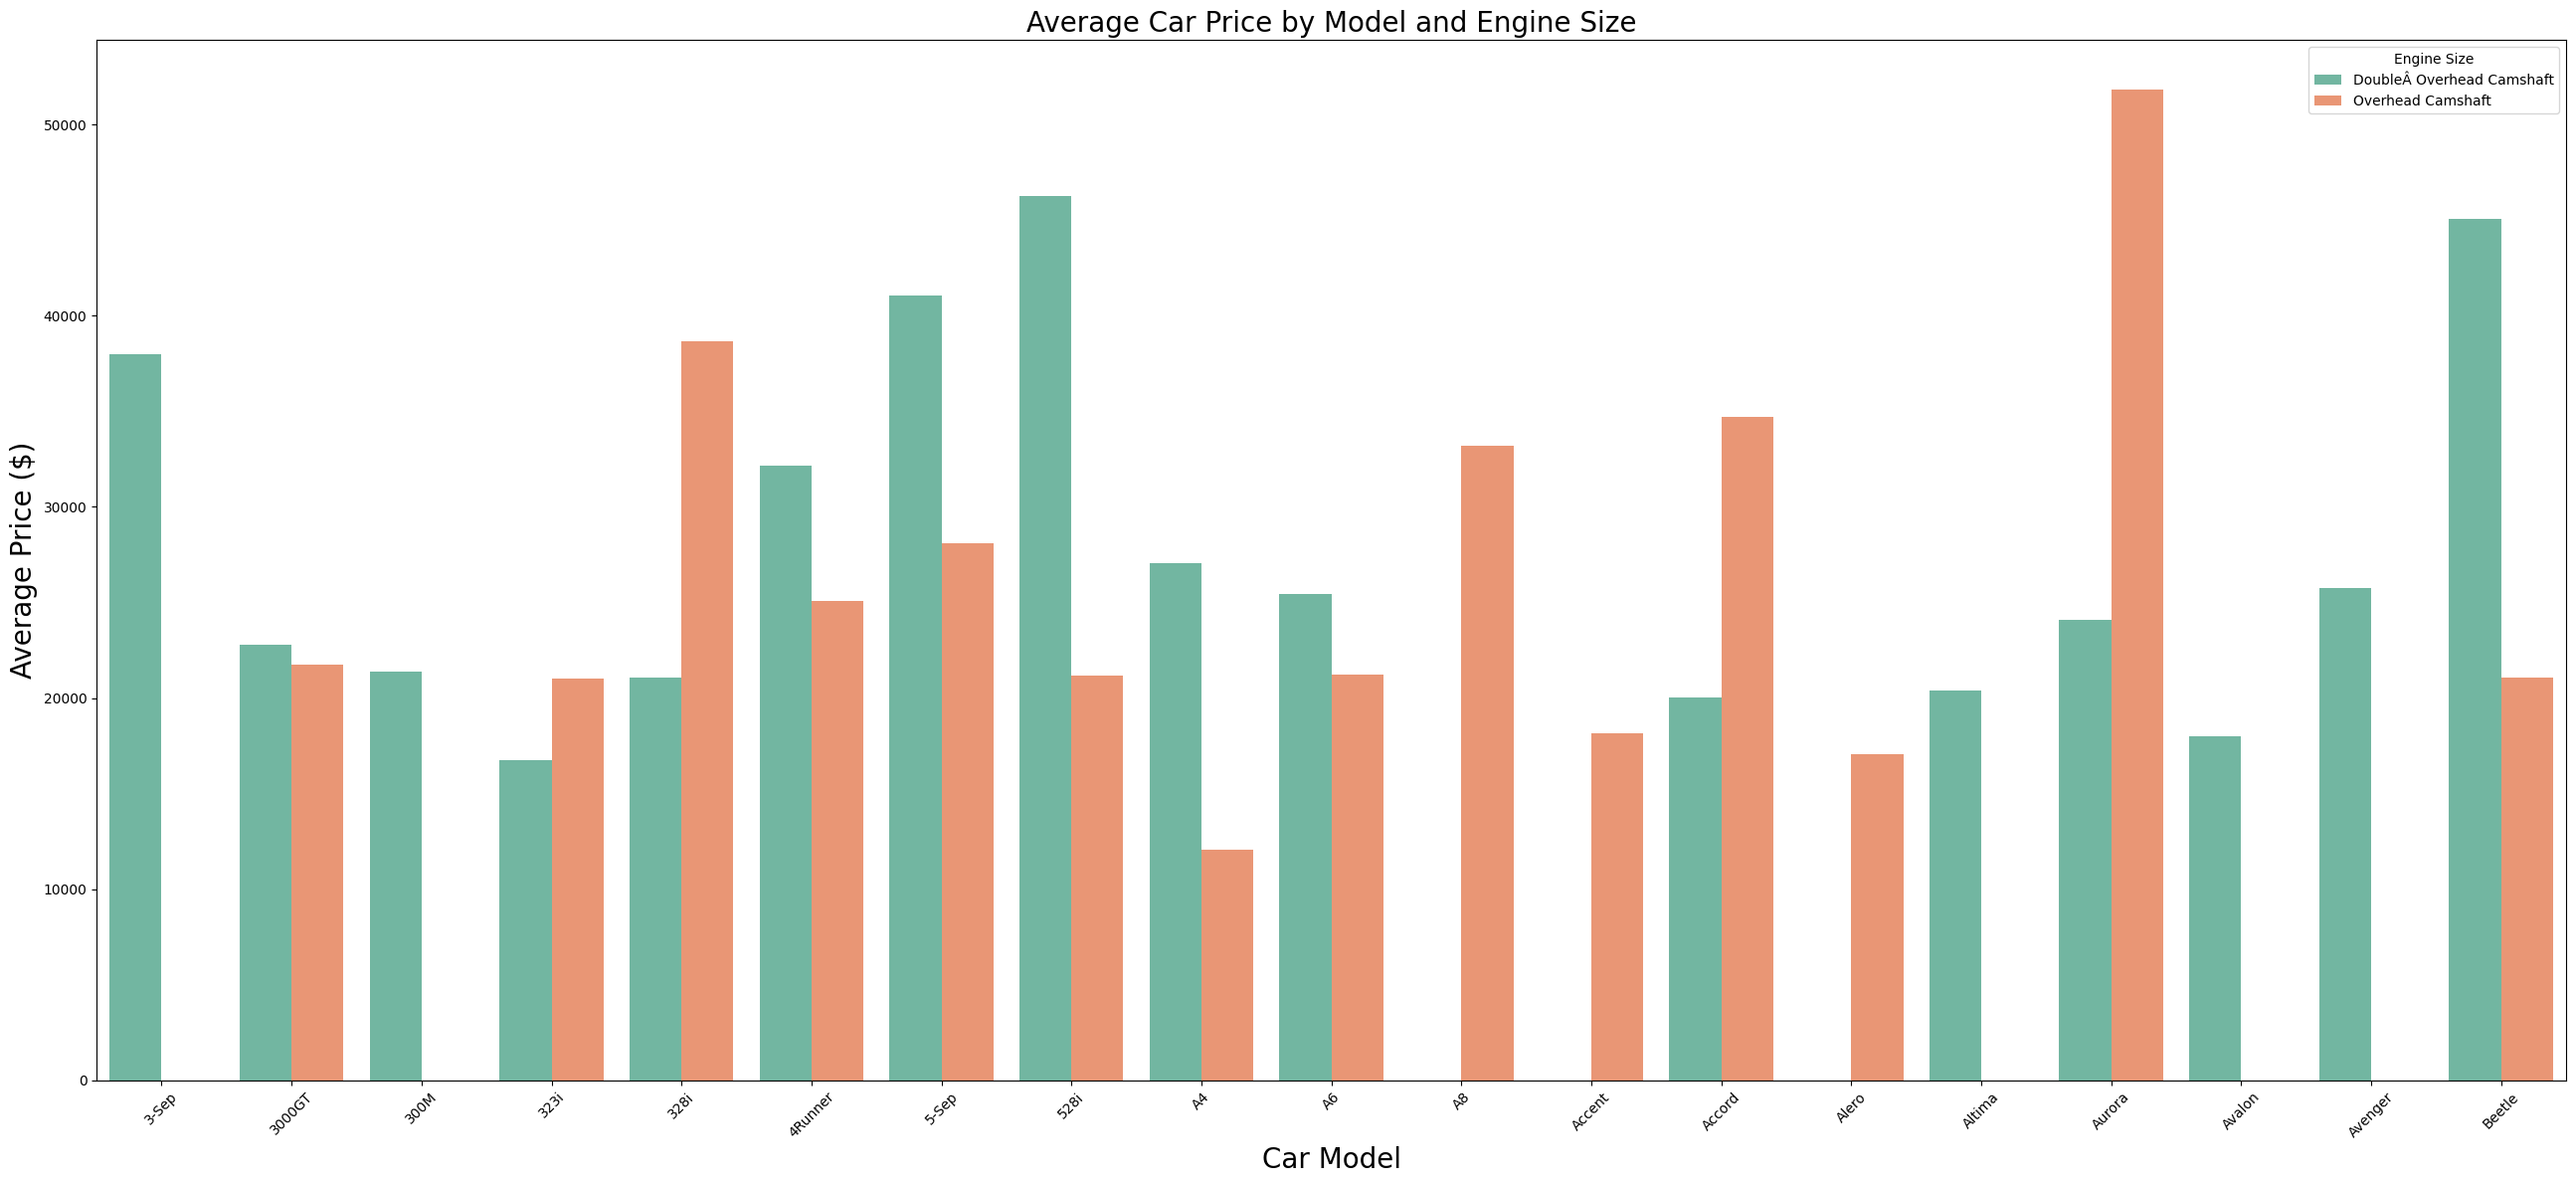

In [207]:
# How does the average car price vary across different car models and engine types

avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index().round(2).head(30)
avg_price_by_model_engine.columns = ['Car Model', 'Engine Size', 'Average Price ($)']
print("Average Car Price by Model and Engine Size:")
display(avg_price_by_model_engine)

# Visualize the average car price by model and engine size
plt.figure(figsize=(26, 12))
sns.barplot(data=avg_price_by_model_engine, x='Car Model', y='Average Price ($)', hue='Engine Size', palette='Set2')
plt.title('Average Car Price by Model and Engine Size', fontsize=20)
plt.xlabel('Car Model', fontsize=20)
plt.ylabel('Average Price ($)', fontsize=20)
plt.xticks(rotation=45)
plt.legend(title='Engine Size')
plt.tight_layout()
# plt.legend()
plt.show()


In [184]:
Model = df['Model'].value_counts().reset_index()
display(Model)

,Model,count
0,Diamante,418
1,Silhouette,411
2,Prizm,411
3,Passat,391
4,Ram Pickup,383
...,...,...
149,Mirage,19
150,Alero,18
151,RX300,15
152,Avalon,15


# EDA - 3
## Amazon Sales Data  

In [34]:
df = pd.read_csv('amazon.csv')
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## 1. What is the average rating for each product category

In [ ]:
df['main_category'] = df['category'].str.split('|').str[0]

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by 'main_category' and calculate the average rating
average_rating_by_category = df.groupby('main_category')['rating'].mean().round(2).reset_index()

# Sort by average rating in descending order

average_rating_by_category = average_rating_by_category.sort_values(by='rating', ascending=False)

average_rating_by_category

,main_category,rating
7,OfficeProducts,4.31
8,Toys&Games,4.30
5,HomeImprovement,4.25
1,Computers&Accessories,4.15
2,Electronics,4.08
4,Home&Kitchen,4.04
3,Health&PersonalCare,4.00
6,MusicalInstruments,3.90
0,Car&Motorbike,3.80


## 2. What are the top rating_count products by category

##  3. what is the distribution of discounted prices vs. actual prices

Average Actual Price and Discounted Price by Main Category:


,main_category,actual_price,discounted_price
0,Car&Motorbike,4000.00,2339.00
1,Computers&Accessories,1683.62,842.65
2,Electronics,10127.31,5965.89
3,Health&PersonalCare,1900.00,899.00
4,Home&Kitchen,4162.07,2330.62
5,HomeImprovement,799.00,337.00
6,MusicalInstruments,1347.00,638.00
7,OfficeProducts,397.19,301.58
8,Toys&Games,150.00,150.00


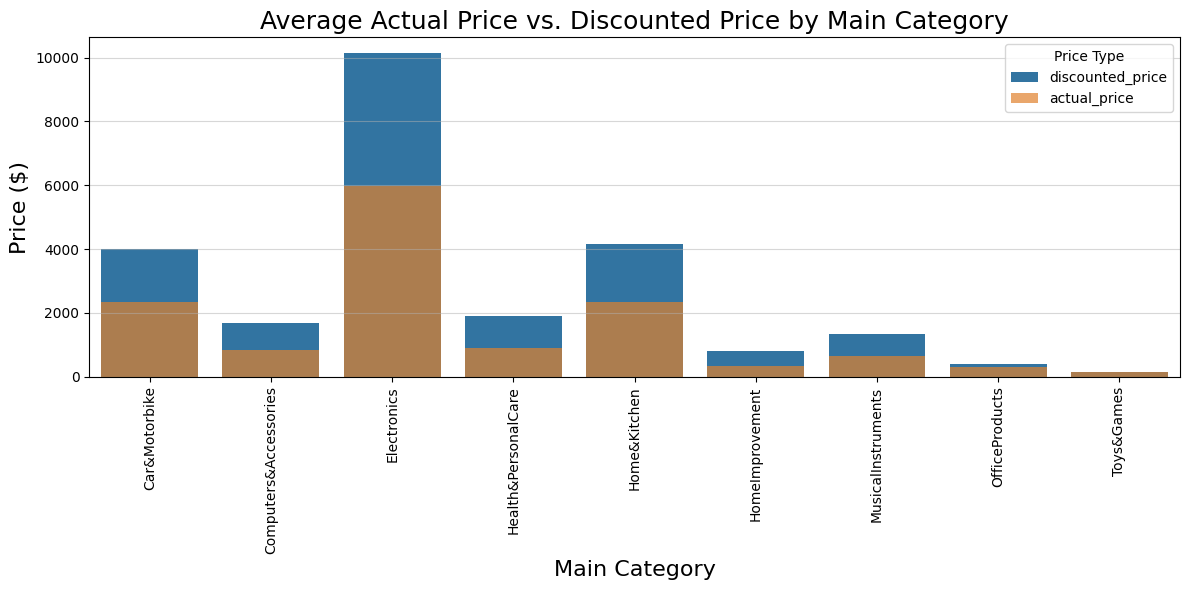

In [123]:
#  the distribution of discounted prices vs. actual prices
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

avg_actul_price = df.groupby('main_category')['actual_price'].mean().reset_index().round(2)
avg_discounted_price = df.groupby('main_category')['discounted_price'].mean().reset_index().round(2)
# Merge the two DataFrames on 'main_category'
price_comparison = pd.merge(avg_actul_price, avg_discounted_price)
print("Average Actual Price and Discounted Price by Main Category:")
display(price_comparison)

# Visualize the distribution of actual prices vs. discounted prices
plt.figure(figsize=(12, 6))
sns.barplot(data=price_comparison, x='main_category', y='actual_price', label='discounted_price')
sns.barplot(data=price_comparison, x='main_category', y='discounted_price', label='actual_price', alpha=0.7)
plt.title('Average Actual Price vs. Discounted Price by Main Category', fontsize=18)    
plt.xlabel('Main Category', fontsize=16)
plt.ylabel('Price ($)', fontsize=16)
plt.xticks(rotation=90)
plt.legend(title='Price Type')  
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()




## 4. How does the average discount percentage vary across categories

In [152]:
#  the average discount percentage vary across categories
df.head(2)
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Calculate the discount percentage
df = df.dropna(subset=['actual_price', 'discounted_price', 'category'])
df['discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

# Group by 'main_category' and calculate the average discount percentage
avg_discount_percentage = df.groupby('main_category')['discount_percentage'].mean().round(2).reset_index()
print("Average Discount Percentage by Main Category:")
display(avg_discount_percentage)

Average Discount Percentage by Main Category:


,main_category,discount_percentage
0,Car&Motorbike,41.52
1,Computers&Accessories,54.02
2,Electronics,50.82
3,Health&PersonalCare,52.68
4,Home&Kitchen,40.12
5,HomeImprovement,57.94
6,MusicalInstruments,45.81
7,OfficeProducts,12.36
8,Toys&Games,0.00


## 5. What are the most popular product names
### Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...

In [154]:
# the most popular product names
most_popular_products = df['product_name'].value_counts().head(5).reset_index()
most_popular_products.columns = ['Product Name', 'Count']
print("Most Popular Products:")
display(most_popular_products)

Most Popular Products:


,Product Name,Count
0,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
1,Fire-Boltt Phoenix Smart Watch with Bluetooth ...,4
2,Wayona Nylon Braided USB to Lightning Fast Cha...,3
3,MI Braided USB Type-C Cable for Charging Adapt...,3
4,Amazonbasics Nylon Braided Usb-C To Lightning ...,3


## 6. What are the most popular product keywords
### black

In [ ]:
#  the most popular product keywords
df.head(2)
# Extract keywords from the 'product_name' column
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=100)
X = vectorizer.fit_transform(df['product_name'].fillna(''))

# Get the feature names (keywords)
keywords = vectorizer.get_feature_names_out()

# Sum the occurrences of each keyword
keyword_counts = X.sum(axis=0).A1

# Create a DataFrame for keywords and their counts
keyword_df = pd.DataFrame({'Keyword': keywords, 'Count': keyword_counts})

# Sort the keywords by count in descending order
keyword_df = keyword_df.sort_values(by='Count', ascending=False).head(10)
print("Most Popular Product Keywords:")
display(keyword_df)

Most Popular Product Keywords:


,Keyword,Count
11,black,530
89,usb,417
16,cable,414
21,charging,247
86,type,243
34,fast,212
75,smart,175
35,fast charging,172
97,white,170
85,tv,152


## 7. What are the most popular product reviews
### Worked on iPhone 7 and didn’t work on XR,Good ...	

In [159]:
# the most popular product reviews
most_popular_reviews = df['review_title'].value_counts().head(5).reset_index()
most_popular_reviews.columns = ['review_title', 'Count']
print("Most Popular Product Reviews:")
display(most_popular_reviews)

Most Popular Product Reviews:


,review_title,Count
0,"Worked on iPhone 7 and didn’t work on XR,Good ...",10
1,"Satisfied,Charging is really fast,Value for mo...",8
2,"Phone, camera, heating - works for me, may not...",8
3,"Good product,Good one,Nice,Really nice product...",7
4,"A Good Braided Cable for Your Type C Device,Go...",7


## 8. What is the correlation between discounted_price and rating

Correlation between Discounted Price and Rating:


,discounted_price,rating
discounted_price,1.0000,0.1211
rating,0.1211,1.0000


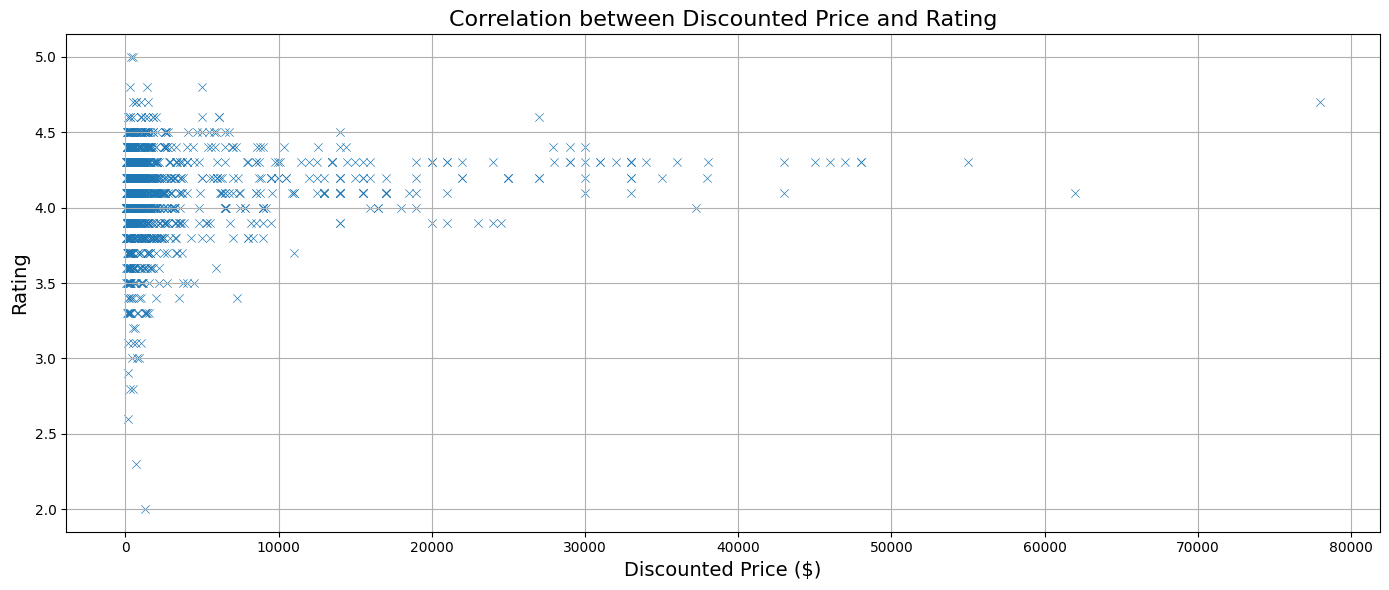

In [206]:
# the correlation between discounted_price and rating

correlation_discount_rating = df[['discounted_price', 'rating']].corr().round(4)
print("Correlation between Discounted Price and Rating:")
display(correlation_discount_rating)

# Visualize the correlation between discounted_price and rating
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='discounted_price', y='rating' , marker='x')
plt.title('Correlation between Discounted Price and Rating', fontsize=16)
plt.xlabel('Discounted Price ($)', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


## 9. What are the Top 5 categories based on the highest ratings

In [197]:
# the Top 5 categories based on the highest ratings
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
top_categories_by_rating = df.groupby('main_category')['rating'].mean().round(2).head(5).reset_index().sort_values(by='rating', ascending=False)

top_categories_by_rating.columns = ['Main Category', 'Average Rating']
print("Top 5 Categories Based on Highest Ratings:") 
display(top_categories_by_rating) 

Top 5 Categories Based on Highest Ratings:


,Main Category,Average Rating
1,Computers&Accessories,4.15
2,Electronics,4.08
4,Home&Kitchen,4.04
3,Health&PersonalCare,4.00
0,Car&Motorbike,3.80


# Identify any potential areas for improvement or optimization based on the data analysis.
## 1. Optimize Underperforming Categories
 ### Some categories have much lower rating_count or fewer reviews compared to others.

### 3. Focus on High-Rating, Low-Review Products 
 
 ## Price Rationalization
### Products with little or no discount may not perform well, even if they're good.



# EDA - 4
## Spotify


In [210]:
df = pd.read_csv('spotify.csv')
df.head(5)


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


### 1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

In [ ]:
print(df.shape)
print()

# check for missing values
print("Missing values per column:\n", df.isnull().sum())

print('--'*30)

#chaeck for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

print('--'*30)

#remove duplicate rows
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])

print('--'*30)

# Check for missing values again
print("Missing values per column after removing duplicates:\n", df.isnull().sum())  

print('--'*30)

print(df.shape)

(413, 5)

Missing values per column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
------------------------------------------------------------
Number of duplicate rows: 0
------------------------------------------------------------
Number of rows after removing duplicates: 413
------------------------------------------------------------
Missing values per column after removing duplicates:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
------------------------------------------------------------
(413, 5)


### 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

,Track Name,Popularity
27,BURN,89.0
12,All The Stars (with SZA),88.0
29,Baby Don't Hurt Me,87.0
24,BACK TO ME,86.0
0,20 Min,84.0
2,3D (feat. Jack Harlow),84.0
14,Alright,82.0
15,Annihilate (Spider-Man: Across the Spider-Vers...,79.0
25,BOP,79.0
28,Baby (Lil Baby feat. DaBaby),77.0


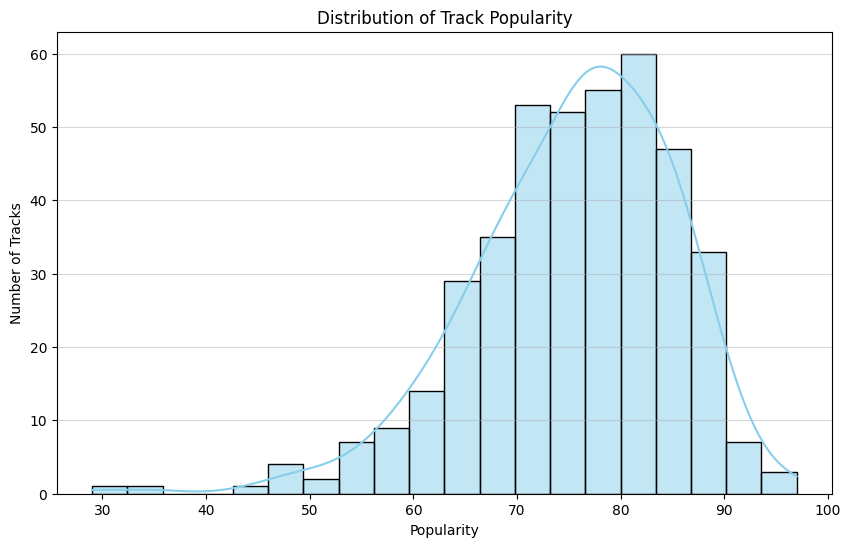

In [270]:
df.head(5)
popularity_by_track = df.groupby('Track Name')['Popularity'].mean().head(30).reset_index()
popularity_by_track = popularity_by_track.sort_values(by='Popularity', ascending=False)
display(popularity_by_track)




# Plot the distribution of popularity using a histogram

plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.grid(axis='y', alpha=0.5)
plt.show()


### 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

### Based on the scatter plot we can conclude that there is no significant relationship between the popularity and the duration of tracks. This implies that factors other than duration are likely more influential in determining a track’s popularity.


In [ ]:

df['Duration_min'] = df['Duration (ms)'] / 60000


,Artist,Track Name,Popularity,Duration (ms),Track ID,Duration_min
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6,5.319850
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0,2.899767
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE,4.335183
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU,4.124067
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe,3.639400


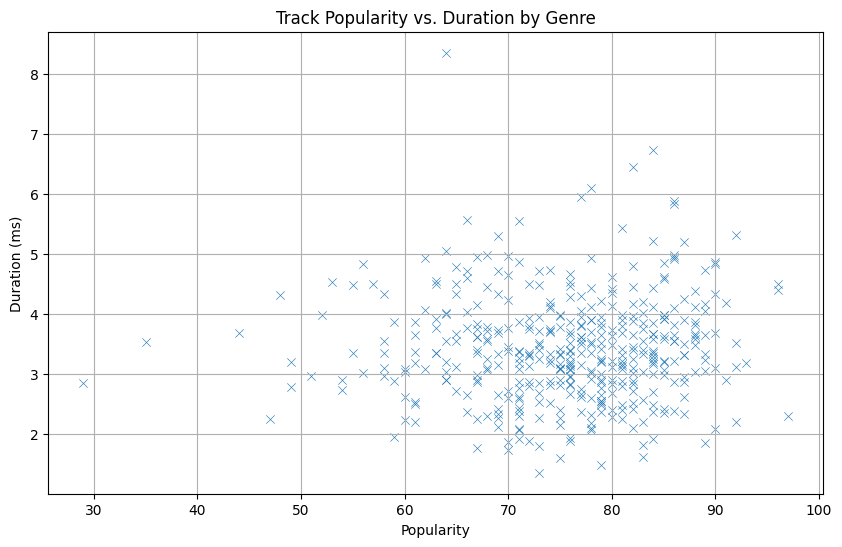

In [300]:
df['Duration_min'] = df['Duration (ms)'] / 60000
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Popularity', y='Duration_min', alpha=0.9, marker='x')
plt.title('Track Popularity vs. Duration by Genre')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.grid(True)

plt.show()

## 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot 
###  Drake has the highest number of tracks in the dataset.

Count of Tracks by Artist:


,Artist,count of Tracks
0,Drake,17
1,Eminem,11
2,Flo Rida,10
3,Ludacris,10
4,Timbaland,10


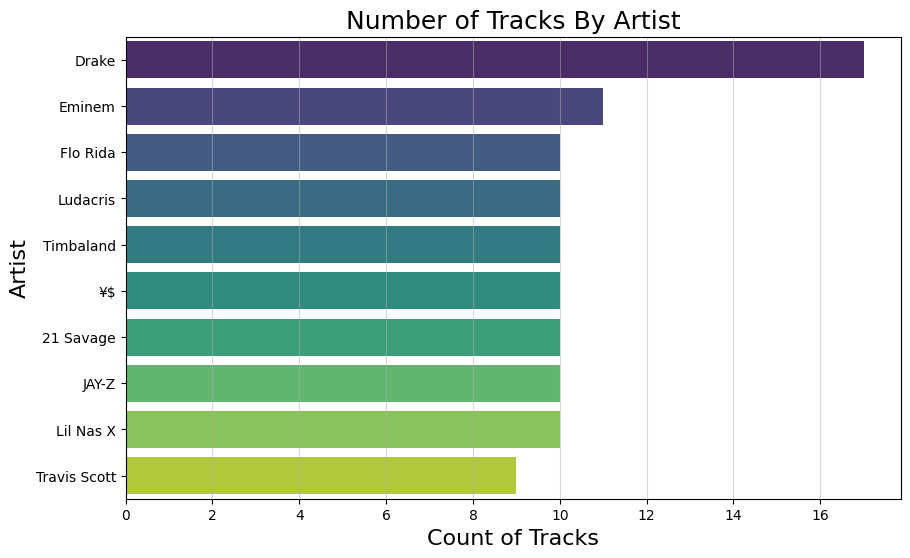

In [328]:
count_of_tracks_by_artist = df['Artist'].value_counts().sort_values(ascending=False).reset_index()
count_of_tracks_by_artist.columns = ['Artist', 'count of Tracks']
print("Count of Tracks by Artist:")
display(count_of_tracks_by_artist.head(5))

# Display the count of tracks for each artist using a countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Artist', order=df['Artist'].value_counts().index[:10], palette='viridis')
plt.title('Number of Tracks By Artist', fontsize = 18)
plt.xlabel('Count of Tracks', fontsize = 16)
plt.ylabel('Artist', fontsize = 16)
plt.grid(axis='x', alpha=0.5)
plt.show()


## 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
### Top 5 least Popular track in datata set are -
| Artist           | Track Name                    
|----------------  |----------------                
| Pressa	       | Attachments (feat. Coi Leray)	
| Justin Bieber    | Intentions                     
|French Montana    | Splash Brothers                
| Lil Baby         | On Me - Remix                 
| Wyclef Jean      | 911 (feat. Mary J. Blige)     





In [354]:
count_track = df.groupby(['Track Name','Artist'])['Popularity'].value_counts().reset_index().sort_values(by='Popularity', ascending=False).tail(10)
# count_track = count_track.sort_values(by='Popularity', ascending=False).head(10)
print("Top 10 Tracks by Popularity Count:")
display(count_track)


Top 10 Tracks by Popularity Count:


,Track Name,Artist,Popularity,count
8,Act A Fool,Ludacris,53,1
324,"Sweetest Girl (Dollar Bill) (feat. Akon, Lil' ...",Wyclef Jean,52,1
47,Blick Blick (with Nicki Minaj),Coi Leray,51,1
227,Okay,French Montana,49,1
196,Millionaire Row,Rick Ross,49,1
5,911 (feat. Mary J. Blige),Wyclef Jean,48,1
231,On Me - Remix,Lil Baby,47,1
302,Splash Brothers,French Montana,44,1
151,Intentions,Justin Bieber,35,1
21,Attachments (feat. Coi Leray),Pressa,29,1


### 6.  Calculate and display the average popularity for each artist
### cassö has the highest popularity on average.

In [366]:
# the average popularity for each artist

avg_popularity_of_artist = df.groupby('Artist')['Popularity'].mean().reset_index().sort_values(by='Popularity', ascending=False).round(2)
print("Top 5 most popular artists:") 
display(avg_popularity_of_artist.head(5))

Top 5 most popular artists:


,Artist,Popularity
113,cassö,92.00
104,Trueno,89.00
24,David Guetta,87.00
103,Travis Scott,86.56
114,¥$,85.10


## 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [ ]:
top_tracks_per_artist = df.sort_values(by='Popularity', ascending=False).drop_duplicates(subset='Artist')
top_5_artists = top_tracks_per_artist.head(5)
print("Top 5 Tracks by Popularity for Each Artist:")
display(top_5_artists[['Artist', 'Track Name', 'Popularity']])


Top 5 Tracks by Popularity for Each Artist:


,Artist,Track Name,Popularity
40,Jack Harlow,Lovin On Me,97
70,21 Savage,redrum,96
260,¥$,CARNIVAL,96
30,Travis Scott,FE!N (feat. Playboi Carti),93
140,cassö,Prada,92


## 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot?


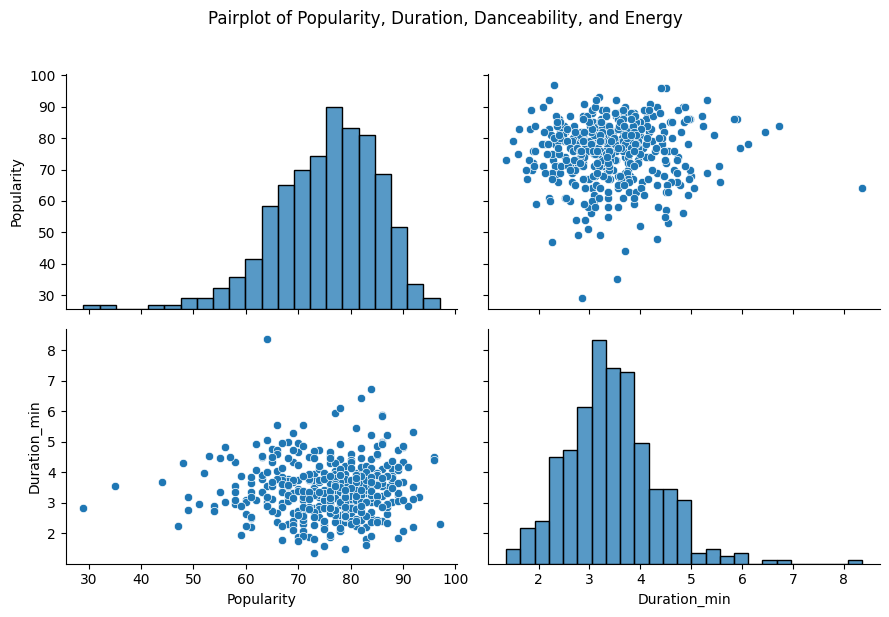

<Figure size 1000x600 with 0 Axes>

In [385]:
sns.pairplot(df, x_vars=['Popularity', 'Duration_min'], y_vars=['Popularity', 'Duration_min'], kind='scatter', height=3, aspect=1.5)
plt.suptitle('Pairplot of Popularity, Duration, Danceability, and Energy', y=1.02)
plt.xlabel('Popularity')
plt.ylabel('Duration (min)')
plt.tight_layout()
plt.figure(figsize=(10, 6))
plt.show()

## 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
### Yes, the duration of tracks vary significantly across different artists

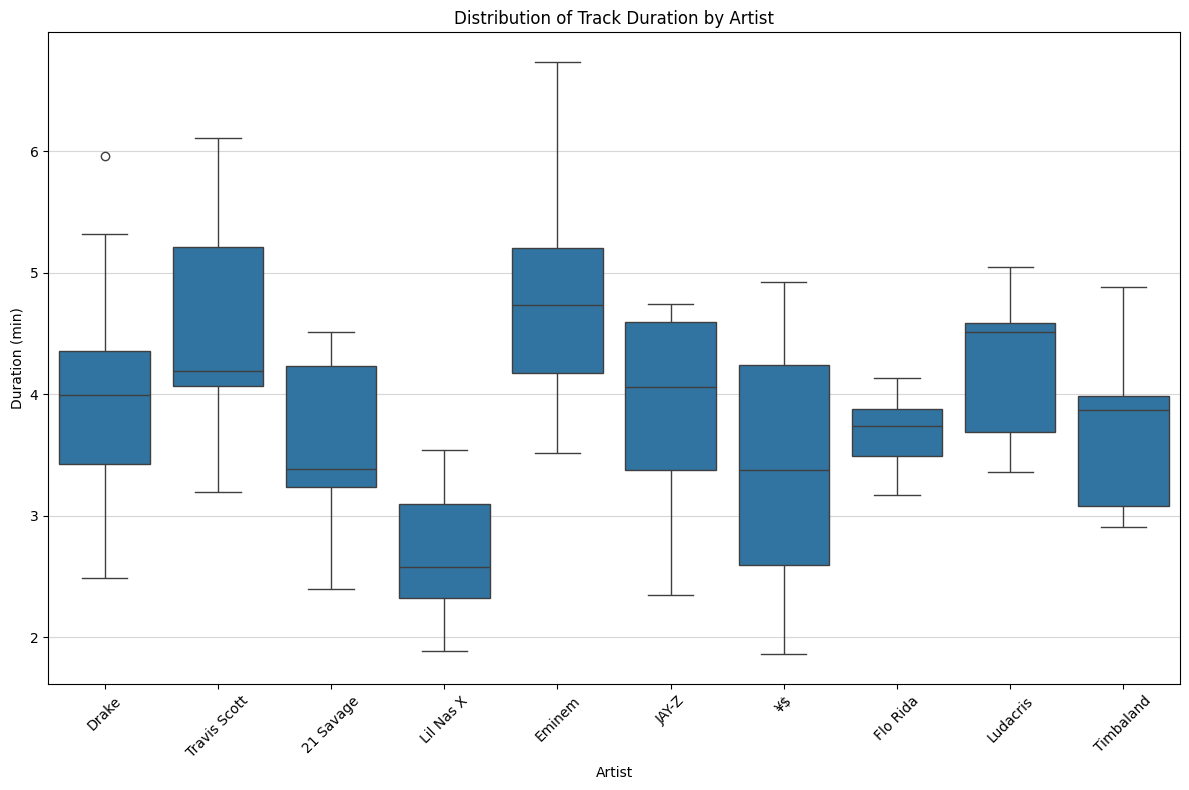

In [ ]:
plt.figure(figsize=(12, 8)) 
# Show only the top 10 artists by number of tracks for readability
top_artists = df['Artist'].value_counts().index[:10]
sns.boxplot(data=df[df['Artist'].isin(top_artists)], x='Artist', y='Duration_min')
plt.title('Distribution of Track Duration by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (min)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

### 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

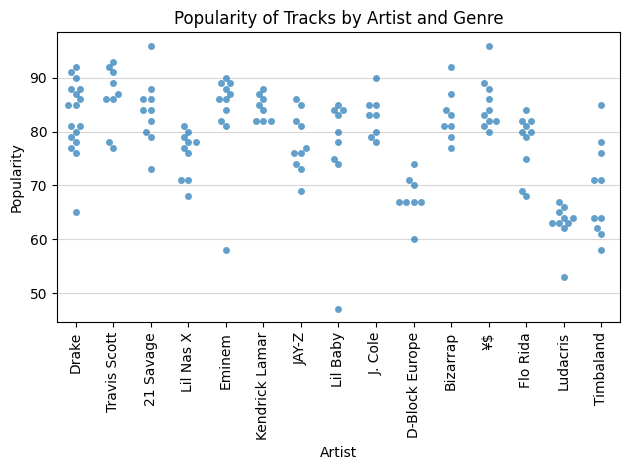

In [413]:

top_artists = df['Artist'].value_counts().index[:15]
plt.Figure(figsize=(18, 8))
sns.swarmplot(data=df[df['Artist'].isin(top_artists)], x='Artist', y='Popularity', dodge=True, alpha=0.7)
plt.title('Popularity of Tracks by Artist and Genre')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()